

##Global imports

In [7]:
from google.colab import files
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

##Upload dataset

Our train set: train.csv is very large (111795 items) and it takes a long time to upload and process (aprox 40 min). 

In [8]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving train.csv to train (1).csv
User uploaded file "train.csv" with length 295072541 bytes


##Data preprocessing

We uploaded the train set and kept it in the form of a dataframe. We then used the values of columns 'Title' and 'Content' in order to create a new column named 'Text' that contains both the title and the content of each of our samples. In that way, we can easily use both of them in order to create the wordclouds.

A)We split our dataset into four sub-dataframes: entertainment_0, technolodgy_1,business_2 and health_3, according to their target value (their label) and then for each dataframe, we merge the content of column 'Text' for all samples, and spit it into words. 

B)Also we define a set of stopwords, which we obtained from the nltk library. Stopwords are words that may appear often in the texts of each sample of our dataset, but aren't of any use to us for the task of classification (words such as "in","a" etc) and so we want to remove them, as they make our train set bigger and thus more difficult to process, without offering anything new. 

In [32]:
df = pd.read_csv("train (1).csv")
df['Text'] = df['Title'] + df['Content']

#A)
entertainment_0 = df[df['Target'] == 0] 
technology_1 = df[df['Target'] == 1] 
business_2 = df[df['Target'] == 2]
health_3 = df[df['Target'] == 3] 

#lists of words
text_0 = " ".join(review for review in entertainment_0.Text.astype(str))
text_1 = " ".join( review for review in technology_1.Text.astype(str))
text_2 = " ".join(review for review in business_2.Text.astype(str))
text_3 = " ".join(review for review in health_3.Text.astype(str))

#B)
stop_words = stopwords.words('english')
stop_words.append('said')
stop_words.append('one')
stop_words.append('two')
stop_words.append('u')
stop_words.append('also')
stop_words.append('say')
stop_words.append('would')
stop_words.append('year')
stop_words.append('may')
stop_words.append('even')
stop_words.append('well')
stop_words.append('however')
stop_words.append('says')
stop_words.append('still')

##Wordclouds generation
Then we use WordCloud().generate() from the wordcloud library, in order to generate wordclouds for each one of our 4 classes, considering also the set of stopwords we have defined. 

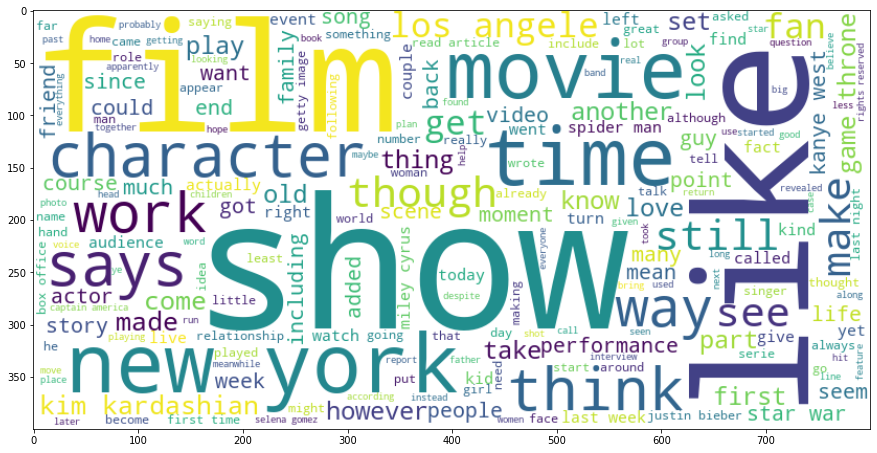

In [25]:
wordcloud_0 = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text_0)

plt.figure(figsize= (15,10))
plt.tight_layout()
plt.imshow(wordcloud_0, interpolation='bilinear')
plt.show()

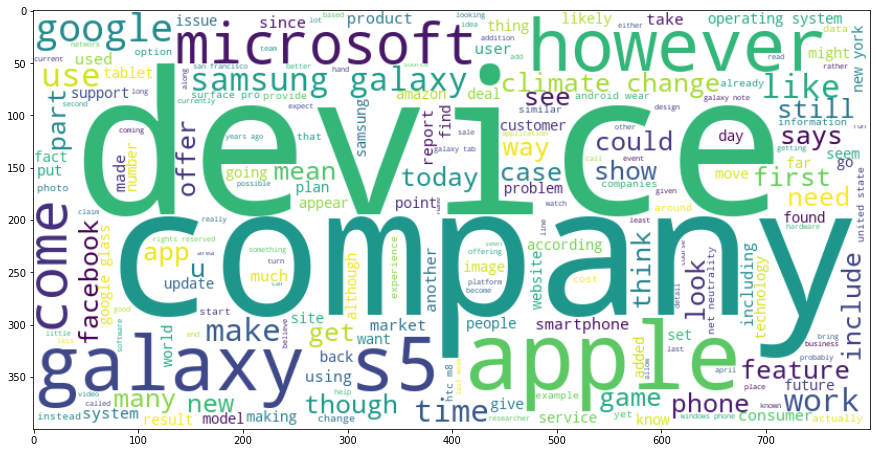

In [26]:
wordcloud_1 = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text_1)

plt.figure(figsize= (15,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud_1, interpolation='bilinear')
plt.show()

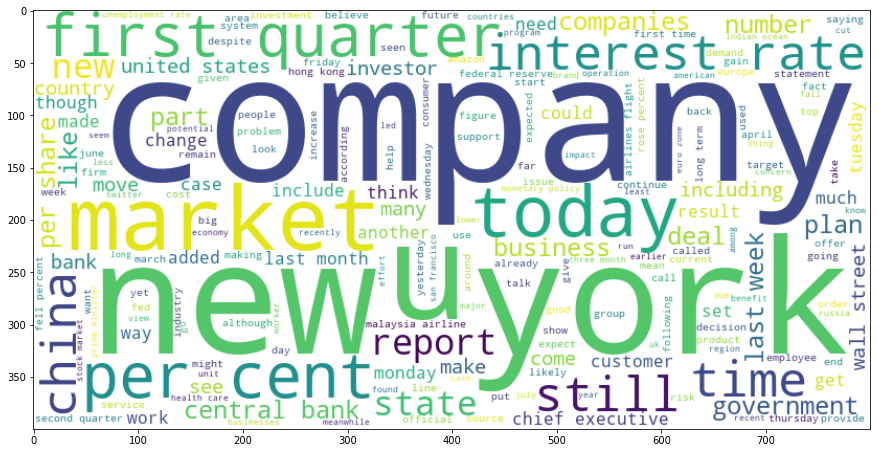

In [31]:
wordcloud_2 = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text_2)

plt.figure(figsize= (15,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud_2, interpolation='bilinear')
plt.show()

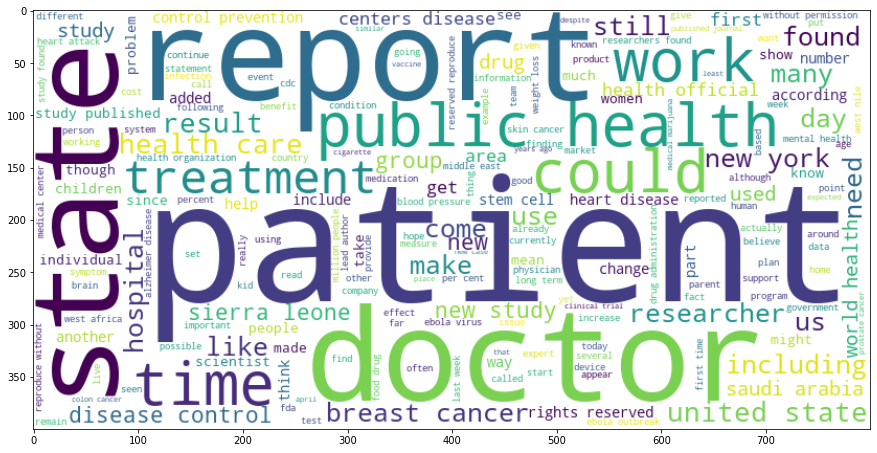

In [30]:
wordcloud_3 = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text_3)

plt.figure(figsize= (15,10))
plt.tight_layout(pad=0)
plt.imshow(wordcloud_3, interpolation='bilinear')
plt.show()